In [3]:
import time
start_time = time.time()

In [4]:

# ==========================
# 1. Importar bibliotecas
# ==========================
import polars as pl
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from pymongo import MongoClient

# Mostrar todas as colunas
pd.set_option('display.max_columns', None)

# Mostrar 10 linhas no head() (o default do pandas já é 5, mas podes mudar)
pd.set_option('display.max_rows', 10)


In [5]:


# ==========================
# 2. Caminho local do ficheiro Parquet
# ==========================
CAMINHO_PARQUET = os.path.join(os.getcwd(), "statsbomb_merged.parquet")

# ==========================
# 3. Ler Parquet (Polars → Pandas)
# ==========================
df_pl = pl.read_parquet(CAMINHO_PARQUET)
df = df_pl.to_pandas()

# ==========================
# 4. Filtrar match_id específico
# ==========================
match_id_alvo = 3895232
df_match = df[df["match_id"] == match_id_alvo]

# ==========================
# 5. Verificar resultado
# ==========================
print(f"✅ Documentos carregados: {len(df_match)}")
df_match.head()


✅ Documentos carregados: 61842


,actor,id,keeper,location_x,match_id,teammate,visible_area,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,block_offensive,block_save_block,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_other,clearance_right_foot,counterpress,dribble_no_touch,dribble_nutmeg,dribble_outcome,dribble_overrun,duel_outcome,duel_type,duration,foul_committed_advantage,foul_committed_card,foul_committed_offensive,foul_committed_penalty,foul_committed_type,foul_won_advantage,foul_won_defensive,foul_won_penalty,goalkeeper_body_part,goalkeeper_end_location,goalkeeper_outcome,goalkeeper_position,goalkeeper_punched_out,goalkeeper_shot_saved_off_target,goalkeeper_shot_saved_to_post,goalkeeper_success_in_play,goalkeeper_success_out,goalkeeper_technique,goalkeeper_type,index,injury_stoppage_in_chain,interception_outcome,location_y,minute,miscontrol_aerial_won,off_camera,out,pass_aerial_won,pass_angle,pass_assisted_shot_id,pass_body_part,pass_cross,pass_cut_back,pass_deflected,pass_end_location,pass_goal_assist,pass_height,pass_inswinging,pass_length,pass_miscommunication,pass_no_touch,pass_outcome,pass_outswinging,pass_recipient,pass_recipient_id,pass_shot_assist,pass_straight,pass_switch,pass_technique,pass_through_ball,pass_type,period,play_pattern,player,player_id,position,possession,possession_team,possession_team_id,related_events,second,shot_aerial_won,shot_body_part,shot_deflected,shot_end_location,shot_first_time,shot_freeze_frame,shot_key_pass_id,shot_one_on_one,shot_open_goal,shot_outcome,shot_saved_off_target,shot_saved_to_post,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_outcome_id,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure
1177826,False,50c22c33-b812-4a3b-9c03-0175309809ed,False,"[46.146007007757085, 40.05777550092676]",3895232,True,"[120.0, 80.0, 0.0, 80.0, 0.0, 78.8131164733342...",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,2.768998,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,5,None,None,"[61.0, 40.1]",0,None,None,None,None,2.954063,None,Right Foot,None,None,None,"[27.8, 46.4]",None,Ground Pass,None,33.792454,None,None,None,None,Manuel Neuer,5570.0,None,None,None,None,None,Kick Off,1,From Kick Off,Leroy Sané,3053.0,Right Attacking Midfield,2,Bayern Munich,169,[13c196fe-41c3-4c6d-b932-ae273d6366ae],0,None,None,None,None,None,None,None,None,None,None,None,None,NaN,None,None,None,NaN,None,NaN,None,Bayern Munich,169,00:00:00.852,Pass,None
1177827,False,50c22c33-b812-4a3b-9c03-0175309809ed,False,"[48.33793010146298, 28.361156687714455]",3895232,True,"[120.0, 80.0, 0.0, 80.0, 0.0, 78.8131164733342...",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,2.768998,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,5,None,None,"[61.0, 40.1]",0,None,None,None,None,2.954063,None,Right Foot,None,None,None,"[27.8, 46.4]",None,Ground Pass,None,33.792454,None,None,None,None,Manuel Neuer,5570.0,None,None,None,None,None,Kick Off,1,From Kick Off,Leroy Sané,3053.0,Right Attacking Midfield,2,Bayern Munich,169,[13c196fe-41c3-4c6d-b932-ae273d6366ae],0,None,None,None,None,None,None,None,None,None,None,None,None,NaN,None,None,None,NaN,None,NaN,None,Bayern Munich,169,00:00:00.852,Pass,None
1177828,False,50c22c33-b812-4a3b-9c03-0175309809ed,False,"[50.70921302127896, 48.23963305892625]",3895232,True,"[120.0, 80.0, 0.0, 80.0, 0.0, 78.8131164733342...",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,2.768998,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,5,None,None,"[61.0, 40.1]",0,None,None,None,None,2.954063,None,Right Foot,None

# ==========================
# 1.1 Estrutura geral do dataset
# ==========================

In [6]:


# Número de linhas e colunas
df.shape

(1953182, 116)

In [7]:
# Nome e tipo de cada coluna
df.dtypes

actor               bool
id                object
keeper              bool
location_x        object
match_id           int64
                   ...  
team              object
team_id            int64
timestamp         object
type              object
under_pressure    object
Length: 116, dtype: object

In [8]:
# Primeiras 5 linhas
df.head()



,actor,id,keeper,location_x,match_id,teammate,visible_area,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,block_offensive,block_save_block,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_other,clearance_right_foot,counterpress,dribble_no_touch,dribble_nutmeg,dribble_outcome,dribble_overrun,duel_outcome,duel_type,duration,foul_committed_advantage,foul_committed_card,foul_committed_offensive,foul_committed_penalty,foul_committed_type,foul_won_advantage,foul_won_defensive,foul_won_penalty,goalkeeper_body_part,goalkeeper_end_location,goalkeeper_outcome,goalkeeper_position,goalkeeper_punched_out,goalkeeper_shot_saved_off_target,goalkeeper_shot_saved_to_post,goalkeeper_success_in_play,goalkeeper_success_out,goalkeeper_technique,goalkeeper_type,index,injury_stoppage_in_chain,interception_outcome,location_y,minute,miscontrol_aerial_won,off_camera,out,pass_aerial_won,pass_angle,pass_assisted_shot_id,pass_body_part,pass_cross,pass_cut_back,pass_deflected,pass_end_location,pass_goal_assist,pass_height,pass_inswinging,pass_length,pass_miscommunication,pass_no_touch,pass_outcome,pass_outswinging,pass_recipient,pass_recipient_id,pass_shot_assist,pass_straight,pass_switch,pass_technique,pass_through_ball,pass_type,period,play_pattern,player,player_id,position,possession,possession_team,possession_team_id,related_events,second,shot_aerial_won,shot_body_part,shot_deflected,shot_end_location,shot_first_time,shot_freeze_frame,shot_key_pass_id,shot_one_on_one,shot_open_goal,shot_outcome,shot_saved_off_target,shot_saved_to_post,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_outcome_id,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure
0,False,ff56e821-21e9-4cef-ba2a-7eb5eb3769c6,False,"[33.623681824113135, 40.159018633164074]",3895302,True,"[16.638549335883955, 80.0, 42.634221931834276,...",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1.995802,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,8,None,None,"[59.0, 40.6]",0,None,None,None,None,3.033232,None,Right Foot,None,None,None,"[35.1, 43.2]",None,Ground Pass,None,24.041006,None,None,None,None,Christian Groß,31100.0,None,None,None,None,None,None,1,From Kick Off,Marvin Ducksch,12299.0,Left Center Forward,2,Werder Bremen,176,[ae74c490-d721-45ca-936f-3975b25d1c94],4,None,None,None,None,None,None,None,None,None,None,None,None,NaN,None,None,None,NaN,None,NaN,None,Werder Bremen,176,00:00:04.732,Pass,None
1,False,ff56e821-21e9-4cef-ba2a-7eb5eb3769c6,False,"[36.74041423873898, 53.63999223538578]",3895302,True,"[16.638549335883955, 80.0, 42.634221931834276,...",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1.995802,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,8,None,None,"[59.0, 40.6]",0,None,None,None,None,3.033232,None,Right Foot,None,None,None,"[35.1, 43.2]",None,Ground Pass,None,24.041006,None,None,None,None,Christian Groß,31100.0,None,None,None,None,None,None,1,From Kick Off,Marvin Ducksch,12299.0,Left Center Forward,2,Werder Bremen,176,[ae74c490-d721-45ca-936f-3975b25d1c94],4,None,None,None,None,None,None,None,None,None,None,None,None,NaN,None,None,None,NaN,None,NaN,None,Werder Bremen,176,00:00:04.732,Pass,None
2,False,ff56e821-21e9-4cef-ba2a-7eb5eb3769c6,False,"[41.68140190196648, 24.747150774999632]",3895302,True,"[16.638549335883955, 80.0, 42.634221931834276,...",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1.995802,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,8,None,None,"[59.0, 40.6]",0,None,None,None,None,3.033232,None,Right Foot,None,None,None,"[35.1, 

In [9]:
summary_stats = df.describe()

print("Resumo Estatístico das Variáveis Numéricas:")
summary_stats


Resumo Estatístico das Variáveis Numéricas:


,match_id,duration,index,minute,pass_angle,pass_length,pass_recipient_id,period,player_id,possession,possession_team_id,second,shot_statsbomb_xg,substitution_outcome_id,substitution_replacement_id,team_id
count,1.953182e+06,1.402800e+06,1.953182e+06,1.953182e+06,550818.000000,550818.000000,537602.000000,1.953182e+06,1.953098e+06,1.953182e+06,1.953182e+06,1.953182e+06,13900.000000,0.0,0.0,1.953182e+06
mean,3.895197e+06,1.196140e+00,2.029744e+03,4.510425e+01,0.002453,18.287666,26628.533361,1.489861e+00,2.698293e+04,8.098434e+01,6.636966e+02,2.945582e+01,0.099406,NaN,NaN,6.441542e+02
std,8.727962e+01,1.250165e+00,1.184197e+03,2.693502e+01,1.627531,11.919008,38352.995328,4.998973e-01,4.012819e+04,4.700345e+01,3.398968e+02,1.733434e+01,0.128504,NaN,NaN,3.459840e+02
min,3.895052e+06,0.000000e+00,5.000000e+00,0.000000e+00,-3.136715,0.000000,3053.000000,1.000000e+00,3.053000e+03,2.000000e+00,1.690000e+02,0.000000e+00,0.003449,NaN,NaN,1.690000e+02
25%,3.895121e+06,4.393140e-01,1.014000e+03,2.200000e+01,-1.328545,10.309219,8667.000000,1.000000e+00,8.667000e+03,4.000000e+01,1.840000e+02,1.400000e+01,0.031648,NaN,NaN,1.840000e+02
50%,3.895194e+06,9.790900e-01,2.011000e+03,4.500000e+01,0.000000,15.155857,16532.000000,1.000000e+00,1.587900e+04,8.000000e+01,9.040000e+02,2.900000e+01,0.055660,NaN,NaN,9.040000e+02
75%,3.895275e+06,1.574967e+00,3.029000e+03,6.800000e+01,1.335645,22.652372,32712.000000,2.000000e+00,3.271200e+04,1.200000e+02,9.040000e+02,4.400000e+01,0.107562,NaN,NaN,9.040000e+02
max,3.895348e+06,4.869110e+01,4.890000e+03,9.800000e+01,3.141593,95.143310,426425.000000,2.000000e+00,4.264250e+05,1.890000e+02,9.040000e+02,5.900000e+01,0.940326,NaN,NaN,9.040000e+02


# ==========================
# 1.2 Inspeção informativa
# ==========================

In [ ]:


# Resumo estatístico (só para colunas numéricas)
df.describe()

# Resumo estatístico completo (inclui categóricas)
df.describe(include='all')



In [ ]:
# Contagem de valores nulos por coluna
df.isna().sum()

# Percentagem de valores nulos por coluna
(df.isna().mean() * 100).round(2)

In [ ]:
# ==========================
# 1.2 (definitivo) Deteção e tratamento de colunas não-hashable
# ==========================

# Identificar colunas com pelo menos um valor list ou dict
colunas_problematicas = []
for c in df.columns:
    try:
        # Tenta calcular valores únicos (se falhar, é problemática)
        df[c].nunique()
    except TypeError:
        colunas_problematicas.append(c)

# Criar lista de colunas seguras (hashable)
colunas_hashable = [c for c in df.columns if c not in colunas_problematicas]

# Calcular duplicados e valores únicos só nas colunas hashable
duplicados = df[colunas_hashable].duplicated().sum()
nunique_validas = df[colunas_hashable].nunique()

duplicados, nunique_validas


(np.int64(0),
 _id               61842
 actor                 2
 id                 3649
 keeper                2
 match_id              1
                   ...  
 team                  2
 team_id               2
 timestamp          2482
 type                 18
 under_pressure        1
 Length: 109, dtype: int64)

# ==========================
# 1.3 Identificação de tipos de variáveis
# ==========================

In [ ]:


# Separar variáveis numéricas
num_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Separar variáveis categóricas (object ou category)
cat_vars = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Separar variáveis temporais (datetime)
time_vars = df.select_dtypes(include=['datetime64[ns]']).columns.tolist()

# Separar variáveis booleanas
bool_vars = df.select_dtypes(include=['bool']).columns.tolist()

# Mostrar resultado
{
    'Numéricas': num_vars,
    'Categóricas': cat_vars,
    'Temporais': time_vars,
    'Booleanas': bool_vars
}


{'Numéricas': ['match_id',
  '50_50',
  'bad_behaviour_card',
  'ball_recovery_offensive',
  'block_save_block',
  'clearance_other',
  'dribble_no_touch',
  'duration',
  'foul_committed_offensive',
  'foul_committed_penalty',
  'foul_won_penalty',
  'goalkeeper_end_location',
  'goalkeeper_punched_out',
  'goalkeeper_shot_saved_off_target',
  'goalkeeper_success_in_play',
  'goalkeeper_success_out',
  'index',
  'injury_stoppage_in_chain',
  'minute',
  'miscontrol_aerial_won',
  'pass_angle',
  'pass_length',
  'pass_miscommunication',
  'pass_no_touch',
  'pass_recipient_id',
  'period',
  'player_id',
  'possession',
  'possession_team_id',
  'second',
  'shot_one_on_one',
  'shot_open_goal',
  'shot_saved_off_target',
  'shot_statsbomb_xg',
  'substitution_outcome',
  'substitution_outcome_id',
  'substitution_replacement',
  'substitution_replacement_id',
  'tactics',
  'team_id'],
 'Categóricas': ['_id',
  'id',
  'location_x',
  'visible_area',
  'ball_receipt_outcome',
  'bal

# ==========================
# 1.4 Verificação de coerência dos tipos
# ==========================

In [ ]:

num_like = []
date_like = []

for col in df.columns:
    # Só aplicar lógica se a coluna for object
    if df[col].dtype == 'object':
        # Converter temporariamente tudo para string, ignorando NaN
        col_str = df[col].dropna().astype(str)
        
        # Detetar colunas numéricas disfarçadas de texto (ex: "123" ou "45.6")
        if col_str.str.fullmatch(r'-?\d+(\.\d+)?').sum() > 0.8 * len(col_str):
            num_like.append(col)
        
        # Detetar colunas que parecem datas (ex: "2024-09-01" ou "01/09/2024")
        elif col_str.str.contains(r'\d{4}[-/]\d{2}[-/]\d{2}|\d{2}[-/]\d{2}[-/]\d{4}', na=False).any():
            date_like.append(col)

{
    'Numéricas_mas_texto': num_like,
    'Datas_mas_texto': date_like
}


{'Numéricas_mas_texto': [], 'Datas_mas_texto': []}

# ==========================
# 1.5 Verificação de consistência dos valores
# ==========================

In [ ]:
# Intervalo (mínimo e máximo) de cada variável numérica
ranges = df.describe().loc[['min', 'max']]

# Procurar valores negativos (apenas em variáveis numéricas)
negativos = {}
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    if (df[col] < 0).any():
        negativos[col] = int((df[col] < 0).sum())

# Procurar valores acima de 100 (útil para percentagens)
acima_100 = {}
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    if (df[col] > 100).any():
        acima_100[col] = int((df[col] > 100).sum())

# Resultado final
{
    'Intervalos': ranges,
    'Valores_negativos': negativos,
    'Valores_acima_de_100': acima_100
}

{'Intervalos':       match_id  50_50  bad_behaviour_card  ball_recovery_offensive  \
 min  3895232.0    NaN                 NaN                      NaN   
 max  3895232.0    NaN                 NaN                      NaN   
 
      block_save_block  clearance_other  dribble_no_touch   duration  \
 min               NaN              NaN               NaN   0.000000   
 max               NaN              NaN               NaN  14.854641   
 
      foul_committed_offensive  foul_committed_penalty  foul_won_penalty  \
 min                       NaN                     NaN               NaN   
 max                       NaN                     NaN               NaN   
 
      goalkeeper_end_location  goalkeeper_punched_out  \
 min                      NaN                     NaN   
 max                      NaN                     NaN   
 
      goalkeeper_shot_saved_off_target  goalkeeper_success_in_play  \
 min                               NaN                         NaN   
 max      

# ==========================
# 1.6 Análise de completude (missing values)
# ==========================

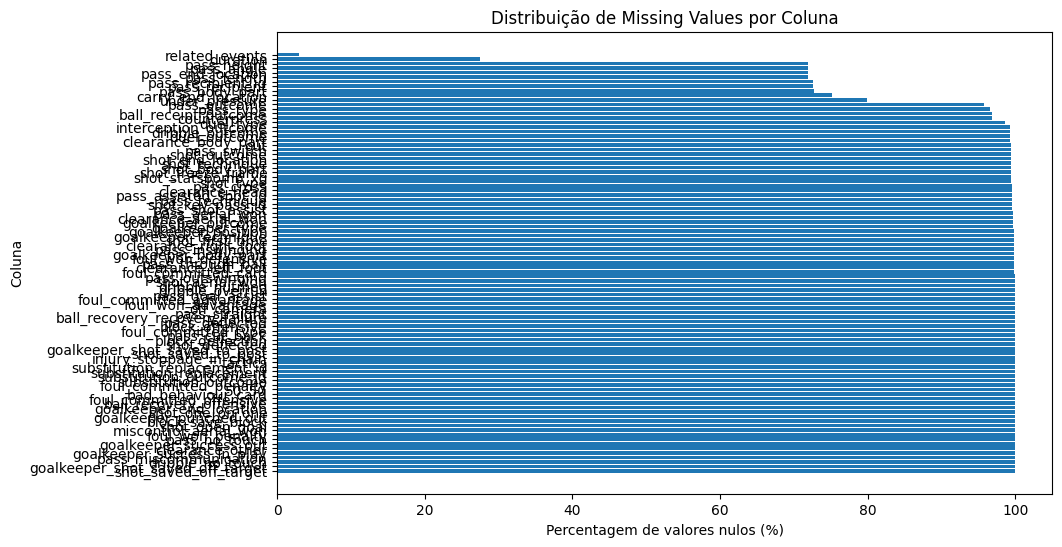

In [ ]:


import matplotlib.pyplot as plt

# Contagem absoluta e percentual de valores nulos
missing_abs = df.isna().sum()
missing_pct = (df.isna().mean() * 100).round(2)

# Criar DataFrame resumo
missing_df = (
    pd.DataFrame({'Valores_nulos': missing_abs, 'Percentagem': missing_pct})
    .sort_values('Percentagem', ascending=False)
)

# Mostrar tabela
missing_df

# Gráfico das colunas com mais de 0% de missing
cols_com_missing = missing_df[missing_df['Valores_nulos'] > 0]

plt.figure(figsize=(10, 6))
plt.barh(cols_com_missing.index, cols_com_missing['Percentagem'])
plt.xlabel('Percentagem de valores nulos (%)')
plt.ylabel('Coluna')
plt.title('Distribuição de Missing Values por Coluna')
plt.grid(False)
plt.show()


# ==========================
# 1.7 Análise sem rejeição (caracterização dos missing values)
# ==========================

In [ ]:

from IPython.display import display

# Top 15 colunas com mais missing
top_missing = (
    missing_df
    .head(15)
    .style
    .set_caption("🔝 Top 15 colunas com mais missing values")
    .background_gradient(cmap="Reds", subset=["Percentagem"])
    .format({'Percentagem': '{:.1f}%'})
)

# Top 15 colunas com menos missing
bottom_missing = (
    missing_df
    .tail(15)
    .style
    .set_caption("🔻 Top 15 colunas com menos missing values")
    .background_gradient(cmap="Greens", subset=["Percentagem"])
    .format({'Percentagem': '{:.1f}%'})
)

# Mostrar tabelas organizadas
display(top_missing)
display(bottom_missing)


,Valores_nulos,Percentagem
shot_saved_off_target,61842,100.0%
goalkeeper_shot_saved_off_target,61842,100.0%
dribble_no_touch,61842,100.0%
pass_miscommunication,61842,100.0%
goalkeeper_success_in_play,61842,100.0%
clearance_other,61842,100.0%
goalkeeper_success_out,61842,100.0%
pass_no_touch,61842,100.0%
foul_won_penalty,61842,100.0%
miscontrol_aerial_won,61842,100.0%


,Valores_nulos,Percentagem
id,0,0.0%
play_pattern,0,0.0%
actor,0,0.0%
index,0,0.0%
location_y,0,0.0%
minute,0,0.0%
player,0,0.0%
period,0,0.0%
second,0,0.0%
possession_team_id,0,0.0%


# ==========================
# 1.7.1 Correlação entre missing values
# ==========================
# Ver se certas colunas têm missing simultaneamente (útil em dados de eventos)

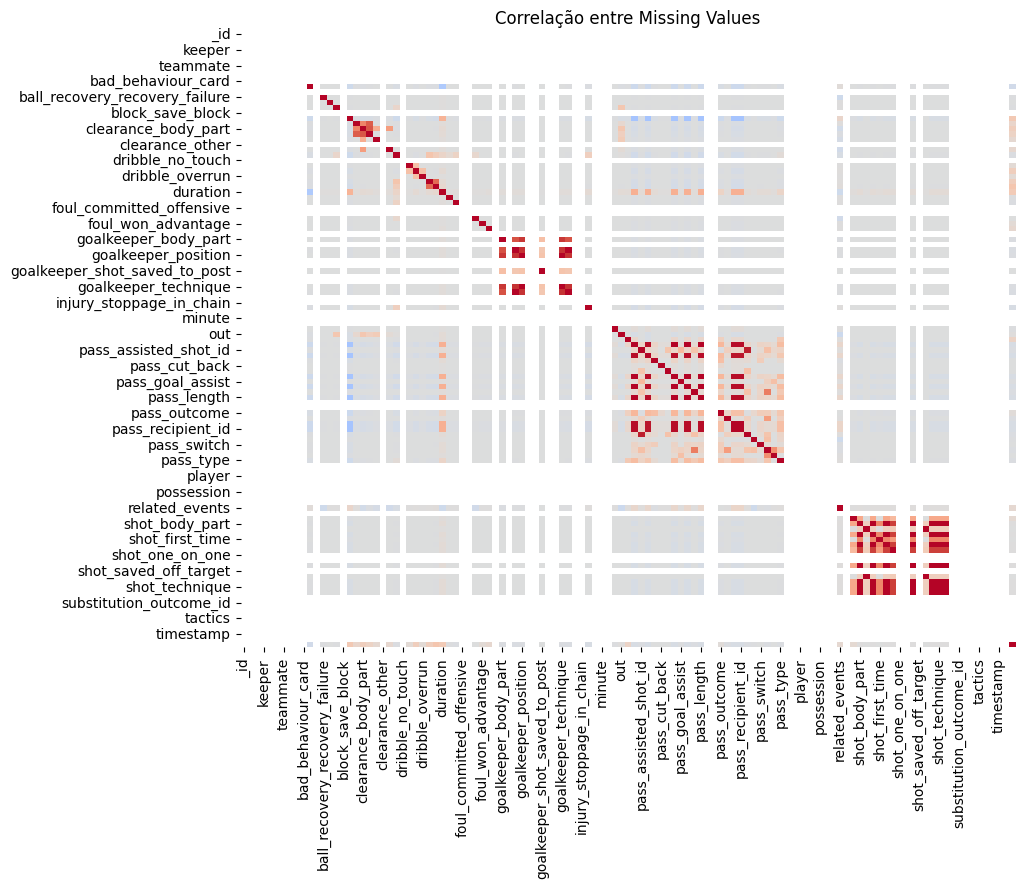

In [ ]:


import seaborn as sns
import numpy as np

# Criar matriz binária (1 = missing, 0 = presente)
missing_matrix = df.isna().astype(int)

# Calcular correlação de presença/ausência
corr_missing = missing_matrix.corr()

# Visualizar correlação dos missing
plt.figure(figsize=(10, 8))
sns.heatmap(corr_missing, cmap='coolwarm', center=0, cbar=False)
plt.title('Correlação entre Missing Values')
plt.grid(False)
plt.show()


# ==========================
# 2.1 Verificação de duplicados e unicidade
# ==========================

In [ ]:
# ==========================
# 2.1 Verificação de duplicados e unicidade (versão final limpa)
# ==========================

import pandas as pd
from IPython.display import display

# Copiar e converter listas em strings apenas para verificação
df_temp = df.copy()
for col in df_temp.columns:
    if df_temp[col].apply(lambda x: isinstance(x, list)).any():
        df_temp[col] = df_temp[col].astype(str)

# Contagem de duplicados e unicidade
duplicados_totais = df_temp.duplicated().sum()
duplicados_colunas = df_temp.columns[df_temp.apply(lambda x: x.duplicated().any())].tolist()

# Verificar identificador principal
if 'id' in df_temp.columns:
    id_unico = df_temp['id'].is_unique
    id_col = 'id'
elif '_id' in df_temp.columns:
    id_unico = df_temp['_id'].is_unique
    id_col = '_id'
elif 'index' in df_temp.columns:
    id_unico = df_temp['index'].is_unique
    id_col = 'index'
else:
    id_unico = None
    id_col = '(nenhum encontrado)'

# Criar DataFrame resumo
resultado_df = pd.DataFrame({
    'Verificação': [
        'Total de duplicados (linhas idênticas)',
        'Colunas com valores repetidos',
        f'Coluna de ID principal ({id_col}) é única'
    ],
    'Resultado': [
        duplicados_totais,
        ', '.join(duplicados_colunas) if duplicados_colunas else 'Nenhuma',
        id_unico
    ]
})

# Estilo visual limpo e compatível
styled = (
    resultado_df.style
    .set_caption("🔎 Verificação de duplicados e unicidade")
    .set_table_styles([
        {'selector': 'caption', 'props': [('font-weight', 'bold'), ('font-size', '14px')]},
        {'selector': 'th', 'props': [('text-align', 'left')]},
        {'selector': 'td', 'props': [('text-align', 'left')]}
    ])
    .highlight_null(color='lightgrey')
)

display(styled)


,Verificação,Resultado
0,Total de duplicados (linhas idênticas),0
1,Colunas com valores repetidos,"actor, id, keeper, location_x, match_id, teammate, visible_area, 50_50, bad_behaviour_card, ball_receipt_outcome, ball_recovery_offensive, ball_recovery_recovery_failure, block_deflection, block_offensive, block_save_block, carry_end_location, clearance_aerial_won, clearance_body_part, clearance_head, clearance_left_foot, clearance_other, clearance_right_foot, counterpress, dribble_no_touch, dribble_nutmeg, dribble_outcome, dribble_overrun, duel_outcome, duel_type, duration, foul_committed_advantage, foul_committed_card, foul_committed_offensive, foul_committed_penalty, foul_committed_type, foul_won_advantage, foul_won_defensive, foul_won_penalty, goalkeeper_body_part, goalkeeper_end_location, goalkeeper_outcome, goalkeeper_position, goalkeeper_punched_out, goalkeeper_shot_saved_off_target, goalkeeper_shot_saved_to_post, goalkeeper_success_in_play, goalkeeper_success_out, goalkeeper_technique, goalkeeper_type, index, injury_stoppage_in_chain, interception_outcome, location_y, minute, miscontrol_aerial_won, off_camera, out, pass_aerial_won, pass_angle, pass_assisted_shot_id, pass_body_part, pass_cross, pass_cut_back, pass_deflected, pass_end_location, pass_goal_assist, pass_height, pass_inswinging, pass_length, pass_miscommunication, pass_no_touch, pass_outcome, pass_outswinging, pass_recipient, pass_recipient_id, pass_shot_assist, pass_straight, pass_switch, pass_technique, pass_through_ball, pass_type, period, play_pattern, player, player_id, position, possession, possession_team, possession_team_id, related_events, second, shot_aerial_won, shot_body_part, shot_deflected, shot_end_location, shot_first_time, shot_freeze_frame, shot_key_pass_id, shot_one_on_one, shot_open_goal, shot_outcome, shot_saved_off_target, shot_saved_to_post, shot_statsbomb_xg, shot_technique, shot_type, substitution_outcome, substitution_outcome_id, substitution_replacement, substitution_replacement_id, tactics, team, team_id, timestamp, type, under_pressure"
2,Coluna de ID principal (id) é única,False


# ==========================
# 2.2 Coerência cruzada (player_id ↔ team_id ↔ match_id)
# ==========================

In [ ]:
from IPython.display import display

# Garantir que as colunas necessárias existem
cols = [c for c in ['player_id', 'team_id', 'match_id'] if c in df.columns]

if len(cols) < 2:
    print("⚠️ Não há colunas suficientes para verificar coerência cruzada.")
else:
    # 1️⃣ Número de equipas por jogador
    equipas_por_jogador = (
        df.groupby('player_id')['team_id']
        .nunique()
        .reset_index()
        .rename(columns={'team_id': 'n_equipas'})
        .sort_values('n_equipas', ascending=False)
    )

    # 2️⃣ Jogadores com mais de uma equipa (potencial inconsistência)
    inconsistentes = equipas_por_jogador[equipas_por_jogador['n_equipas'] > 1]

    # 3️⃣ Número de jogadores únicos por equipa
    jogadores_por_equipa = (
        df.groupby('team_id')['player_id']
        .nunique()
        .reset_index()
        .rename(columns={'player_id': 'n_jogadores'})
        .sort_values('n_jogadores', ascending=False)
    )

    # 4️⃣ Resumo principal
    resumo_df = pd.DataFrame({
        'Verificação': [
            'Total de equipas analisadas',
            'Total de jogadores analisados',
            'Jogadores com mais de uma equipa (inconsistentes)',
        ],
        'Resultado': [
            df['team_id'].nunique(),
            df['player_id'].nunique(),
            len(inconsistentes),
        ]
    })

    # ==========================
    # Estilo visual limpo
    # ==========================
    styled_resumo = (
        resumo_df.style
        .set_caption("🔗 Coerência cruzada geral")
        .set_table_styles([
            {'selector': 'caption', 'props': [('font-weight', 'bold'), ('font-size', '14px')]},
            {'selector': 'th', 'props': [('text-align', 'left')]},
            {'selector': 'td', 'props': [('text-align', 'left')]}
        ])
    )

    styled_inconsistentes = (
        inconsistentes.style
        .set_caption("⚠️ Jogadores associados a mais de uma equipa")
        .background_gradient(cmap="Reds", subset=['n_equipas'])
    )

    styled_equipa = (
        jogadores_por_equipa.style
        .set_caption("👥 Número de jogadores por equipa")
        .background_gradient(cmap="Greens", subset=['n_jogadores'])
    )

    display(styled_resumo)
    display(styled_inconsistentes)
    display(styled_equipa)

,Verificação,Resultado
0,Total de equipas analisadas,2
1,Total de jogadores analisados,31
2,Jogadores com mais de uma equipa (inconsistentes),0


,player_id,n_equipas


,team_id,n_jogadores
0,169,16
1,904,15


# ==========================
# 2.3 Deteção de outliers e anomalias numéricas
# ==========================

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Selecionar apenas colunas numéricas
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calcular limites (IQR)
outlier_summary = []
for col in num_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    outlier_summary.append({
        'Variável': col,
        'Q1': q1,
        'Q3': q3,
        'IQR': iqr,
        'Limite_inferior': lower,
        'Limite_superior': upper,
        'Nº_outliers': outliers
    })

outlier_df = pd.DataFrame(outlier_summary).sort_values('Nº_outliers', ascending=False)

# ==========================
# Visualização tabular
# ==========================
styled_outliers = (
    outlier_df[['Variável', 'Nº_outliers', 'Limite_inferior', 'Limite_superior']]
    .style
    .set_caption("📈 Deteção de outliers por coluna (IQR)")
    .background_gradient(cmap='Reds', subset=['Nº_outliers'])
    .format({'Limite_inferior': '{:.2f}', 'Limite_superior': '{:.2f}'})
)

display(styled_outliers)

,Variável,Nº_outliers,Limite_inferior,Limite_superior
26,player_id,2923,-38795.00,86581.00
7,duration,2040,-1.43,3.49
21,pass_length,859,-9.01,42.82
24,pass_recipient_id,729,-38795.00,86581.00
33,shot_statsbomb_xg,47,-0.04,0.15
0,match_id,0,3895232.00,3895232.00
29,second,0,-32.50,91.50
23,pass_no_touch,0,nan,nan
25,period,0,-0.50,3.50
27,possession,0,-80.00,280.00


# ==========================
# 2.4 Verificação de integridade temporal
# ==========================

In [ ]:
from IPython.display import display

# Garantir que as colunas temporais existem
cols_temporais = [c for c in ['minute', 'second', 'period'] if c in df.columns]

if not cols_temporais:
    print("⚠️ Nenhuma coluna temporal encontrada.")
else:
    # Estatísticas básicas de tempo
    tempo_df = df[cols_temporais].describe().T
    tempo_df['min_absoluto'] = df['minute'].min() if 'minute' in df.columns else None
    tempo_df['max_absoluto'] = df['minute'].max() if 'minute' in df.columns else None

    # Eventos com tempos fora do esperado
    erros_temporais = pd.DataFrame()

    if 'minute' in df.columns:
        erros_temporais['minute_fora_intervalo'] = df[
            (df['minute'] < 0) | (df['minute'] > 120)
        ]['minute']

    if 'second' in df.columns:
        erros_temporais['second_fora_intervalo'] = df[
            (df['second'] < 0) | (df['second'] > 60)
        ]['second']

    if 'period' in df.columns:
        erros_temporais['period_fora_intervalo'] = df[
            ~df['period'].isin([1, 2, 3, 4])
        ]['period']

    # Tabela resumo
    resumo_temporal = pd.DataFrame({
        'Verificação': [
            'Eventos com minuto fora de [0–120]',
            'Eventos com segundo fora de [0–60]',
            'Eventos com período fora de {1, 2, 3, 4}',
        ],
        'Resultado': [
            len(erros_temporais.get('minute_fora_intervalo', [])),
            len(erros_temporais.get('second_fora_intervalo', [])),
            len(erros_temporais.get('period_fora_intervalo', [])),
        ]
    })

    styled_resumo = (
        resumo_temporal.style
        .set_caption("⏱️ Verificação de integridade temporal")
        .background_gradient(cmap='Reds', subset=['Resultado'])
        .set_table_styles([
            {'selector': 'caption', 'props': [('font-weight', 'bold'), ('font-size', '14px')]},
            {'selector': 'th', 'props': [('text-align', 'left')]},
            {'selector': 'td', 'props': [('text-align', 'left')]}
        ])
    )

    display(styled_resumo)

,Verificação,Resultado
0,Eventos com minuto fora de [0–120],0
1,Eventos com segundo fora de [0–60],0
2,"Eventos com período fora de {1, 2, 3, 4}",0


# ==========================
# 2.4.1 Distribuição temporal dos eventos
# ==========================

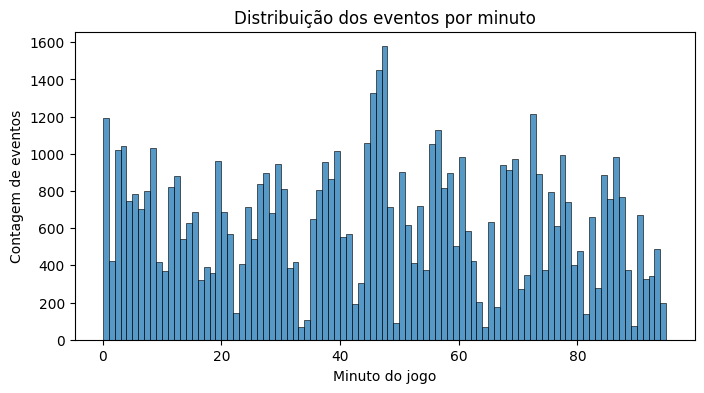

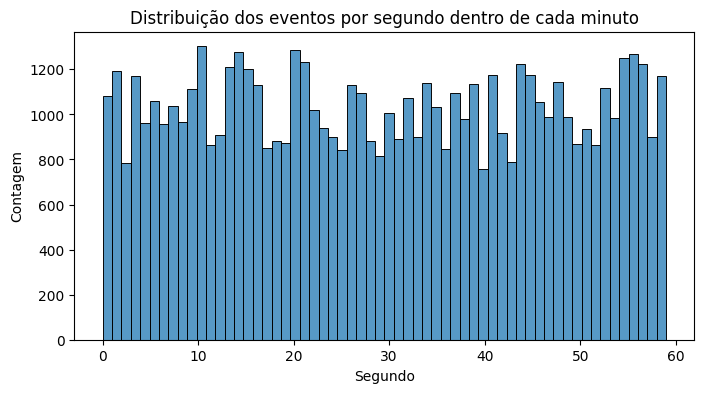

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

if 'minute' in df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df['minute'], bins=range(0, int(df['minute'].max()) + 2), kde=False)
    plt.title('Distribuição dos eventos por minuto')
    plt.xlabel('Minuto do jogo')
    plt.ylabel('Contagem de eventos')
    plt.grid(False)
    plt.show()

if 'second' in df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df['second'], bins=60, kde=False)
    plt.title('Distribuição dos eventos por segundo dentro de cada minuto')
    plt.xlabel('Segundo')
    plt.ylabel('Contagem')
    plt.grid(False)
    plt.show()

# ==========================
# 2.5 Verificação de integridade posicional
# ==========================

,Coordenada,Mínimo,Máximo,Fora_campo
0,x_inicial,-4.06,122.92,15012
1,y_inicial,0.50,120.00,15012


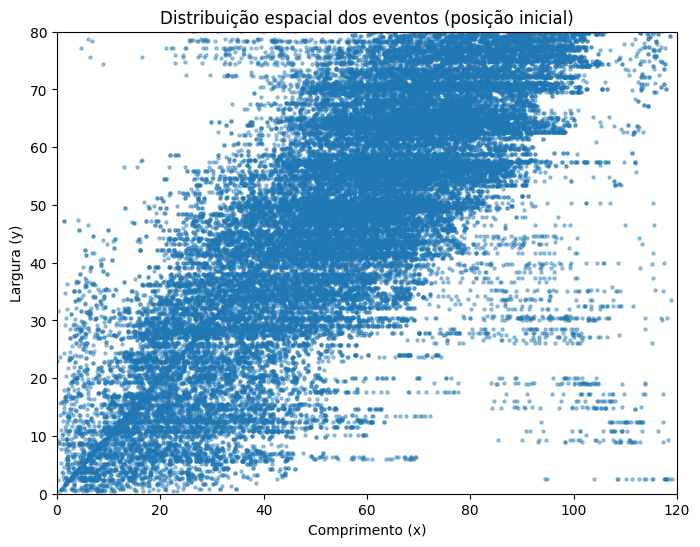

In [ ]:
# ==========================
# 2.5 Verificação de integridade posicional (ajustada ao formato StatsBomb)
# ==========================

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# ==========================
# 2.5.1 Extrair coordenadas iniciais e finais
# ==========================

def extrair_par(v):
    """Extrai coordenadas iniciais e finais de arrays [start, end]."""
    if isinstance(v, (list, tuple, np.ndarray)) and len(v) == 2:
        return v[0], v[1]
    elif isinstance(v, (list, tuple, np.ndarray)) and len(v) == 1:
        return v[0], np.nan
    else:
        return np.nan, np.nan

# Aplicar extração
df['x_inicial'], df['x_final'] = zip(*df['location_x'].apply(extrair_par))
df['y_inicial'], df['y_final'] = zip(*df['location_y'].apply(extrair_par))

# ==========================
# 2.5.2 Verificar limites válidos
# ==========================
fora_campo = (
    ((df['x_inicial'] < 0) | (df['x_inicial'] > 120) |
     (df['y_inicial'] < 0) | (df['y_inicial'] > 80))
).sum()

coord_stats = pd.DataFrame({
    'Coordenada': ['x_inicial', 'y_inicial'],
    'Mínimo': [df['x_inicial'].min(), df['y_inicial'].min()],
    'Máximo': [df['x_inicial'].max(), df['y_inicial'].max()],
    'Fora_campo': [fora_campo, fora_campo]
})

styled_coord = (
    coord_stats.style
    .set_caption("🏟️ Verificação de integridade posicional (posição inicial)")
    .background_gradient(cmap='Reds', subset=['Fora_campo'])
    .format({'Mínimo': '{:.2f}', 'Máximo': '{:.2f}'})
    .set_table_styles([
        {'selector': 'caption', 'props': [('font-weight', 'bold'), ('font-size', '14px')]},
        {'selector': 'th', 'props': [('text-align', 'left')]},
        {'selector': 'td', 'props': [('text-align', 'left')]}
    ])
)

display(styled_coord)

# ==========================
# 2.5.3 Gráfico de dispersão (posição inicial)
# ==========================
plt.figure(figsize=(8, 6))
plt.scatter(df['x_inicial'], df['y_inicial'], s=5, alpha=0.4)
plt.xlim(0, 120)
plt.ylim(0, 80)
plt.title("Distribuição espacial dos eventos (posição inicial)")
plt.xlabel("Comprimento (x)")
plt.ylabel("Largura (y)")
plt.grid(False)
plt.show()


,Métrica,Valor
0,Distância média (m),48.75
1,Distância mediana (m),43.51
2,Desvio padrão (m),29.13
3,Distância máxima (m),169.56


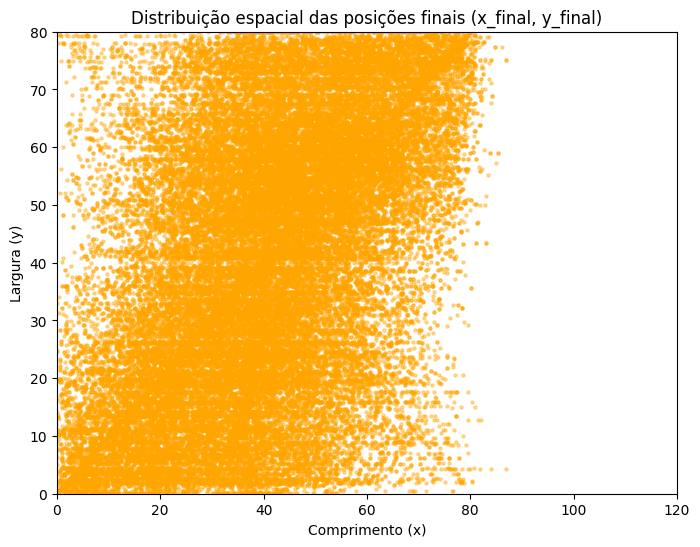

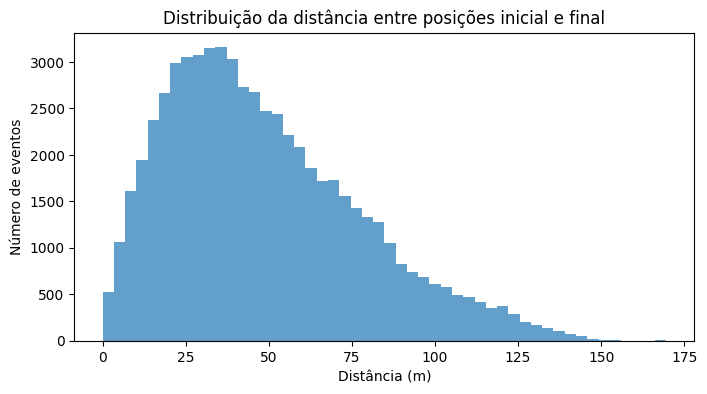

In [ ]:
# ==========================
# 2.6 Análise das posições finais e deslocamento médio
# ==========================

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# Garantir que as colunas finais existem
if 'x_final' not in df.columns or 'y_final' not in df.columns:
    print("⚠️ As colunas x_final e y_final não existem — executa a extração anterior primeiro.")
else:
    # Calcular deslocamento euclidiano
    df['distancia'] = np.sqrt(
        (df['x_final'] - df['x_inicial'])**2 + (df['y_final'] - df['y_inicial'])**2
    )

    # Estatísticas do deslocamento
    deslocamento_stats = pd.DataFrame({
        'Métrica': [
            'Distância média (m)',
            'Distância mediana (m)',
            'Desvio padrão (m)',
            'Distância máxima (m)'
        ],
        'Valor': [
            df['distancia'].mean(),
            df['distancia'].median(),
            df['distancia'].std(),
            df['distancia'].max()
        ]
    })

    styled_desloc = (
        deslocamento_stats.style
        .set_caption("📏 Estatísticas do deslocamento (posição inicial → final)")
        .format({'Valor': '{:.2f}'})
        .set_table_styles([
            {'selector': 'caption', 'props': [('font-weight', 'bold'), ('font-size', '14px')]},
            {'selector': 'th', 'props': [('text-align', 'left')]},
            {'selector': 'td', 'props': [('text-align', 'left')]}
        ])
    )

    display(styled_desloc)

    # ==========================
    # 2.6.1 Gráfico de dispersão das posições finais
    # ==========================
    plt.figure(figsize=(8, 6))
    plt.scatter(df['x_final'], df['y_final'], s=5, alpha=0.4, color='orange')
    plt.xlim(0, 120)
    plt.ylim(0, 80)
    plt.title("Distribuição espacial das posições finais (x_final, y_final)")
    plt.xlabel("Comprimento (x)")
    plt.ylabel("Largura (y)")
    plt.grid(False)
    plt.show()

    # ==========================
    # 2.6.2 Distribuição da distância percorrida
    # ==========================
    plt.figure(figsize=(8, 4))
    plt.hist(df['distancia'], bins=50, alpha=0.7)
    plt.title("Distribuição da distância entre posições inicial e final")
    plt.xlabel("Distância (m)")
    plt.ylabel("Número de eventos")
    plt.grid(False)
    plt.show()


# ==========================
# 3.1 Estatísticas descritivas numéricas
# ==========================

In [ ]:
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionar variáveis numéricas
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Resumo estatístico
desc_num = df[num_cols].describe().T
desc_num['missing_%'] = (df[num_cols].isna().mean() * 100).round(2)

# Formatar visualmente
styled_num = (
    desc_num.style
    .set_caption("📊 Estatísticas descritivas das variáveis numéricas")
    .format({
        'count': '{:,.0f}',
        'mean': '{:.2f}',
        'std': '{:.2f}',
        'min': '{:.2f}',
        '25%': '{:.2f}',
        '50%': '{:.2f}',
        '75%': '{:.2f}',
        'max': '{:.2f}',
        'missing_%': '{:.1f}%'
    })
    .background_gradient(cmap='Blues', subset=['mean'])
    .set_table_styles([
        {'selector': 'caption', 'props': [('font-weight', 'bold'), ('font-size', '14px')]},
        {'selector': 'th', 'props': [('text-align', 'left')]},
        {'selector': 'td', 'props': [('text-align', 'left')]}
    ])
)

display(styled_num)

,count,mean,std,min,25%,50%,75%,max,missing_%
match_id,"61,842",3895232.00,0.00,3895232.00,3895232.00,3895232.00,3895232.00,3895232.00,0.0%
50_50,0,nan,nan,nan,nan,nan,nan,nan,100.0%
bad_behaviour_card,0,nan,nan,nan,nan,nan,nan,nan,100.0%
ball_recovery_offensive,0,nan,nan,nan,nan,nan,nan,nan,100.0%
block_save_block,0,nan,nan,nan,nan,nan,nan,nan,100.0%
clearance_other,0,nan,nan,nan,nan,nan,nan,nan,100.0%
dribble_no_touch,0,nan,nan,nan,nan,nan,nan,nan,100.0%
duration,"44,871",1.20,1.19,0.00,0.42,0.98,1.65,14.85,27.4%
foul_committed_offensive,0,nan,nan,nan,nan,nan,nan,nan,100.0%
foul_committed_penalty,0,nan,nan,nan,nan,nan,nan,nan,100.0%


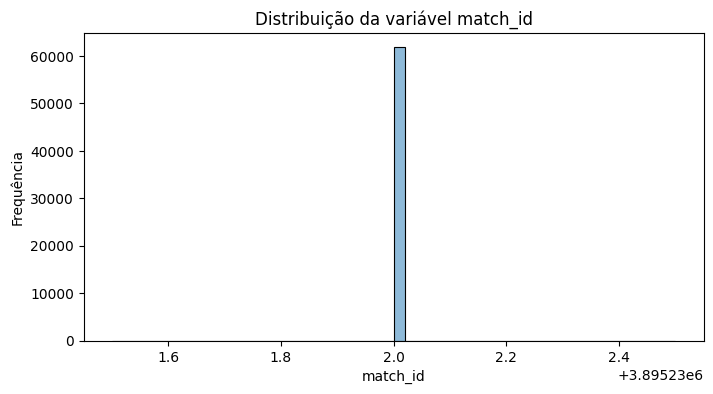

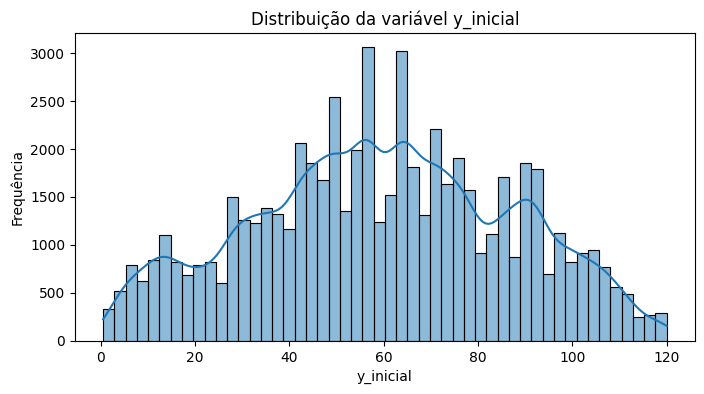

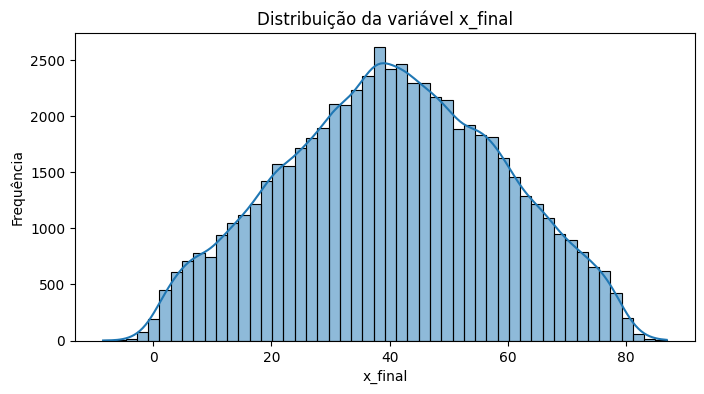

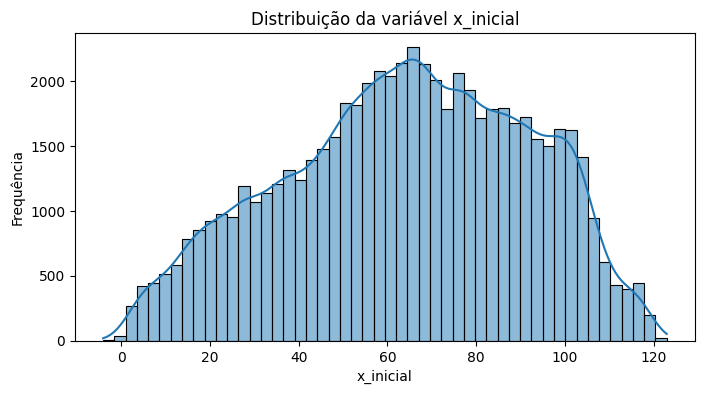

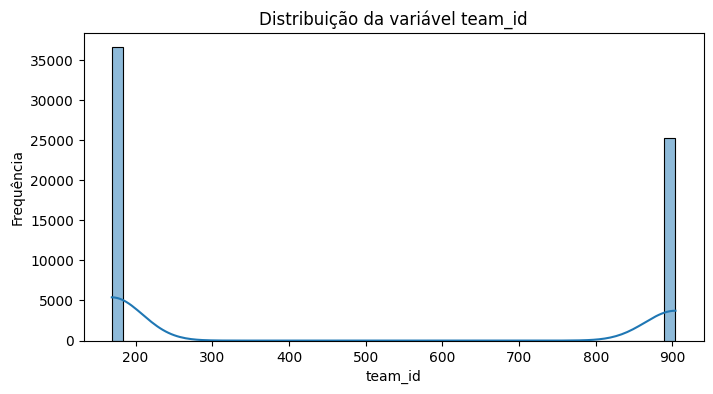

In [ ]:
# Escolher apenas as 5 variáveis mais relevantes com dados completos
top_num = desc_num.sort_values('missing_%').head(5).index

for col in top_num:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f"Distribuição da variável {col}")
    plt.xlabel(col)
    plt.ylabel("Frequência")
    plt.grid(False)
    plt.show()

# ==========================
# 3.2 Estatísticas descritivas categóricas
# ==========================

In [ ]:
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionar variáveis categóricas
cat_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns

# Função para resumo de frequências
def resumo_categorica(col):
    freq = df[col].value_counts(dropna=False).head(10)
    perc = (freq / len(df) * 100).round(2)
    return pd.DataFrame({'Valor': freq.index, 'Frequência': freq.values, 'Percentagem': perc.values})

# Construir tabela resumo das 5 colunas mais relevantes
tabelas_cat = {}
for c in cat_cols[:5]:
    tabelas_cat[c] = resumo_categorica(c)

# Mostrar tabelas formatadas
for nome, tabela in tabelas_cat.items():
    styled = (
        tabela.style
        .set_caption(f"📋 Top 10 valores mais frequentes – {nome}")
        .background_gradient(cmap="Greens", subset=["Frequência"])
        .format({'Percentagem': '{:.2f}%'})
        .set_table_styles([
            {'selector': 'caption', 'props': [('font-weight', 'bold'), ('font-size', '14px')]},
            {'selector': 'th', 'props': [('text-align', 'left')]},
            {'selector': 'td', 'props': [('text-align', 'left')]}
        ])
    )
    display(styled)

,Valor,Frequência,Percentagem
0,680c147291ff8146cda4e3d7,1,0.00%
1,680c147391ff8146cda584bb,1,0.00%
2,680c147391ff8146cda584db,1,0.00%
3,680c147391ff8146cda584dc,1,0.00%
4,680c147391ff8146cda584dd,1,0.00%
5,680c147391ff8146cda584de,1,0.00%
6,680c147391ff8146cda584df,1,0.00%
7,680c147391ff8146cda584e0,1,0.00%
8,680c147391ff8146cda584e1,1,0.00%
9,680c147391ff8146cda584e2,1,0.00%


,Valor,Frequência,Percentagem
0,False,58193,94.10%
1,True,3649,5.90%


,Valor,Frequência,Percentagem
0,3b2f1c73-57f5-4d50-bfd9-393d2bc012fd,21,0.03%
1,19aefb11-14c2-4a84-b8a4-a4d443c98553,21,0.03%
2,423b85d8-7d27-4c06-91c6-e08adde7c625,21,0.03%
3,8d5e0509-c59a-44db-9c74-23e5f66e9f02,21,0.03%
4,302bf9d7-7559-42e3-a205-f08265e18647,21,0.03%
5,5b275e28-dd38-4d74-b358-fe4400341531,21,0.03%
6,5c3b3204-d101-4a16-af00-62216439f8b5,21,0.03%
7,c7acd3eb-3d9d-4783-948f-7ad8a739df63,21,0.03%
8,29555027-0047-4395-b633-0c7629d8dd04,21,0.03%
9,3b633869-2795-4b7a-a554-5e1d8276d84c,21,0.03%


,Valor,Frequência,Percentagem
0,False,60328,97.55%
1,True,1514,2.45%


,Valor,Frequência,Percentagem
0,"[120.0, 80.0]",6,0.01%
1,"[120.0, 0.10000000149011612]",4,0.01%
2,"[117.5999984741211, 50.20000076293945]",4,0.01%
3,"[91.0999984741211, 50.900001525878906]",4,0.01%
4,"[17.21390063339733, 35.7601369700974]",3,0.00%
5,"[20.487700284192783, 23.89279526117698]",3,0.00%
6,"[10.800000190734863, 37.79999923706055]",3,0.00%
7,"[39.900001525878906, 65.5]",3,0.00%
8,"[40.419369273383666, 31.132276497117402]",3,0.00%
9,"[26.091800101992987, 53.875636871853004]",3,0.00%


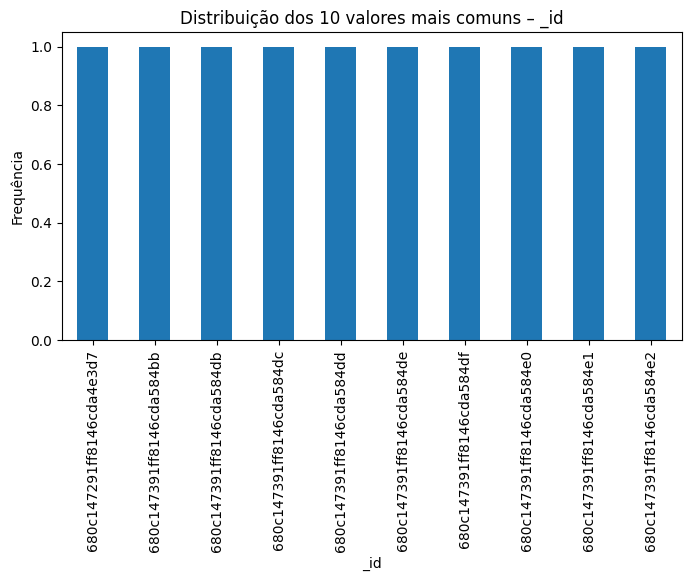

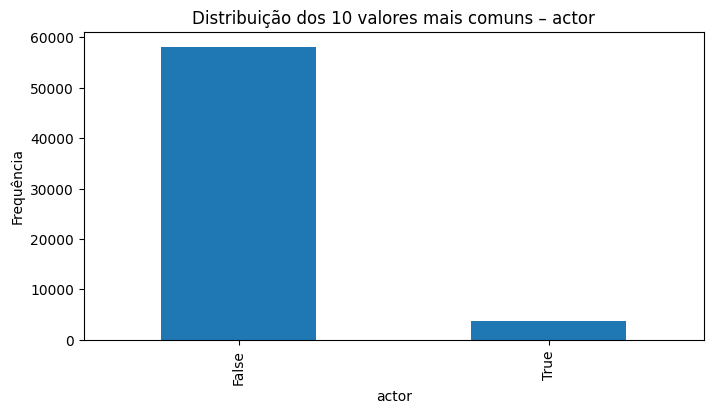

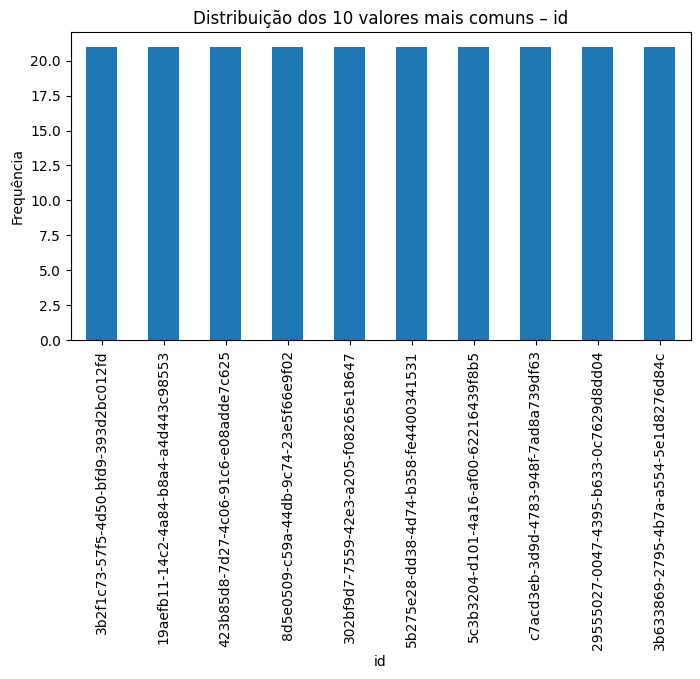

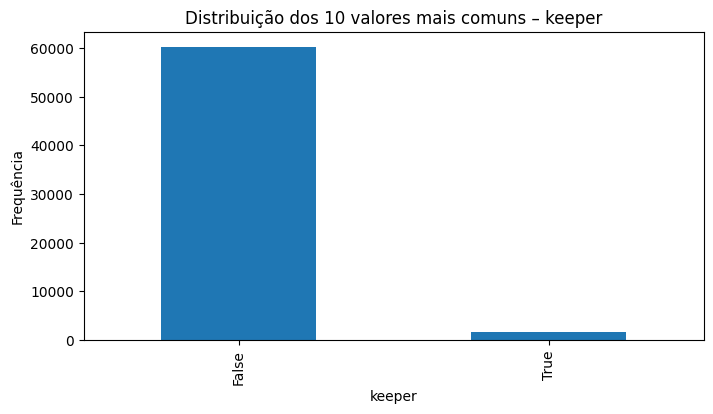

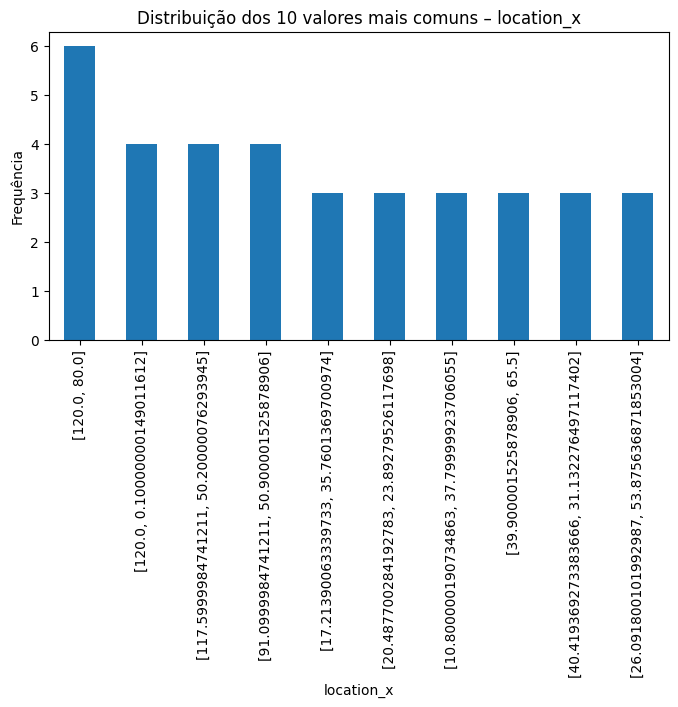

In [ ]:
# ==========================
# 3.2.1 Visualização de frequências categóricas
# ==========================

for c in cat_cols[:5]:
    plt.figure(figsize=(8, 4))
    df[c].value_counts().head(10).plot(kind='bar')
    plt.title(f"Distribuição dos 10 valores mais comuns – {c}")
    plt.xlabel(c)
    plt.ylabel("Frequência")
    plt.grid(False)
    plt.show()


# ==========================
# 4.1 Análise univariada – variáveis numéricas
# ==========================

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Selecionar variáveis numéricas
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calcular assimetria e curtose
stats_univ = pd.DataFrame({
    'Variável': num_cols,
    'Assimetria': [df[c].skew(skipna=True) for c in num_cols],
    'Curtose': [df[c].kurtosis(skipna=True) for c in num_cols]
})

styled_stats = (
    stats_univ.style
    .set_caption("📈 Assimetria e curtose das variáveis numéricas")
    .background_gradient(cmap='Blues', subset=['Assimetria'])
    .background_gradient(cmap='Greens', subset=['Curtose'])
    .format({'Assimetria': '{:.2f}', 'Curtose': '{:.2f}'})
    .set_table_styles([
        {'selector': 'caption', 'props': [('font-weight', 'bold'), ('font-size', '14px')]},
        {'selector': 'th', 'props': [('text-align', 'left')]},
        {'selector': 'td', 'props': [('text-align', 'left')]}
    ])
)

display(styled_stats)

,Variável,Assimetria,Curtose
0,match_id,0.00,0.00
1,50_50,nan,nan
2,bad_behaviour_card,nan,nan
3,ball_recovery_offensive,nan,nan
4,block_save_block,nan,nan
5,clearance_other,nan,nan
6,dribble_no_touch,nan,nan
7,duration,2.77,17.03
8,foul_committed_offensive,nan,nan
9,foul_committed_penalty,nan,nan


/var/folders/8m/hh_3__ks6m12ytdrpdgv3zxc0000gn/T/ipykernel_4116/383457473.py:17: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[c], ax=axes[1], fill=True)


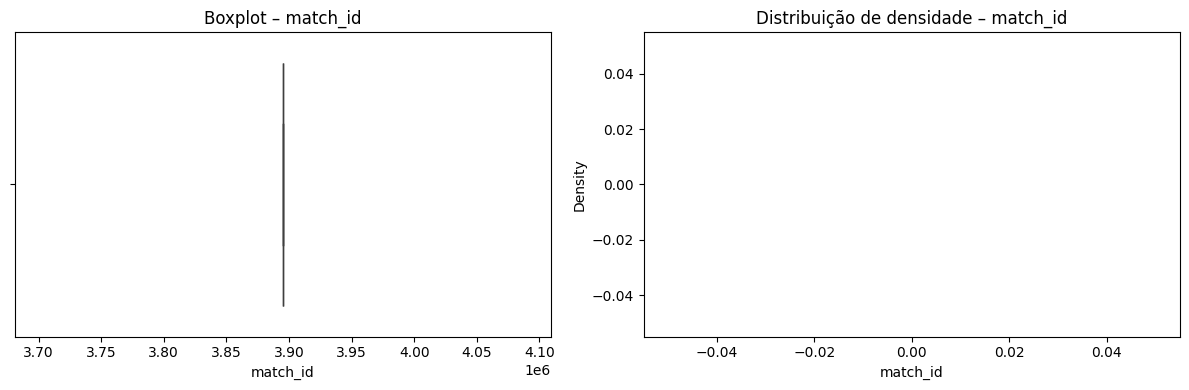

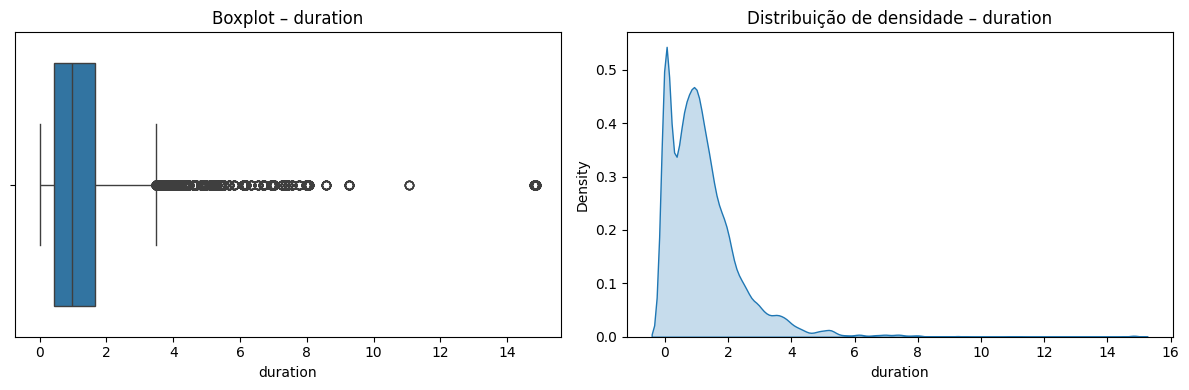

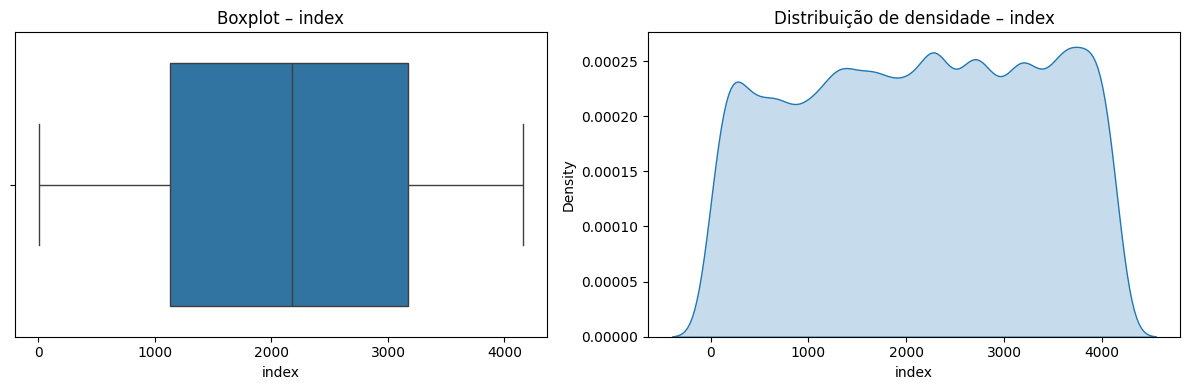

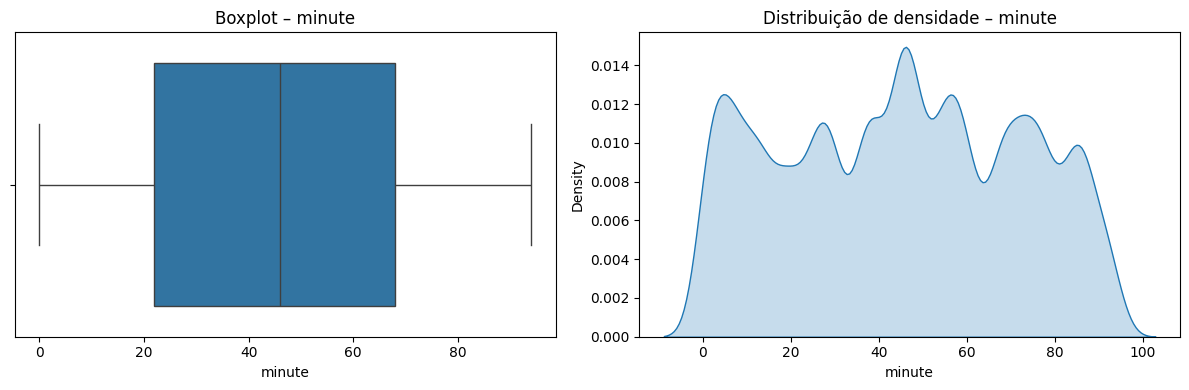

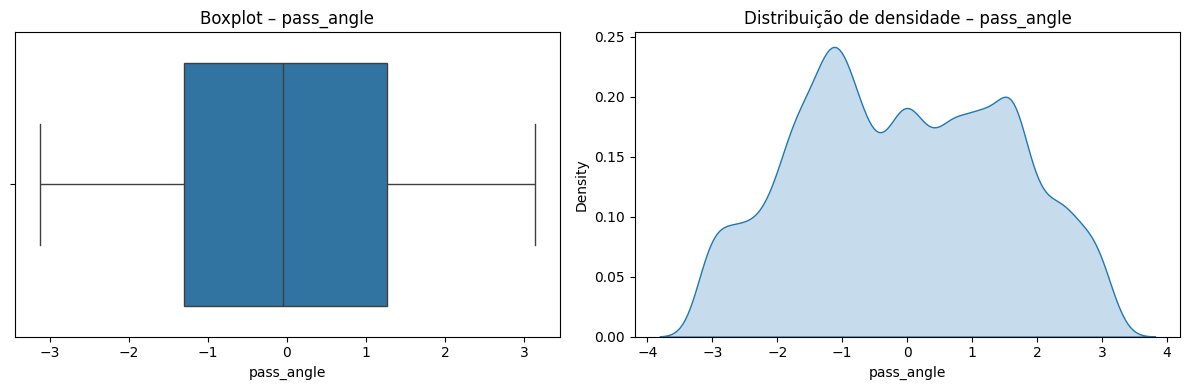

In [ ]:
# ==========================
# 4.1.1 Visualização – Boxplot e densidade
# ==========================

# Selecionar as 5 variáveis mais relevantes com dados completos
top_num = [c for c in num_cols if df[c].notna().sum() > 0][:5]

for c in top_num:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # Boxplot
    sns.boxplot(x=df[c], ax=axes[0])
    axes[0].set_title(f'Boxplot – {c}')
    axes[0].grid(False)
    
    # Densidade
    sns.kdeplot(df[c], ax=axes[1], fill=True)
    axes[1].set_title(f'Distribuição de densidade – {c}')
    axes[1].grid(False)
    
    plt.tight_layout()
    plt.show()


# ==========================
# 4.2 Análise univariada – variáveis categóricas
# ==========================

/var/folders/8m/hh_3__ks6m12ytdrpdgv3zxc0000gn/T/ipykernel_4116/1027590649.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_cat = df[cat_cols].copy().applymap(


,Valor,Frequência,Percentagem
0,680c147291ff8146cda4e3d7,1,0.00%
1,680c147391ff8146cda584bb,1,0.00%
2,680c147391ff8146cda584db,1,0.00%
3,680c147391ff8146cda584dc,1,0.00%
4,680c147391ff8146cda584dd,1,0.00%
5,680c147391ff8146cda584de,1,0.00%
6,680c147391ff8146cda584df,1,0.00%
7,680c147391ff8146cda584e0,1,0.00%
8,680c147391ff8146cda584e1,1,0.00%
9,680c147391ff8146cda584e2,1,0.00%


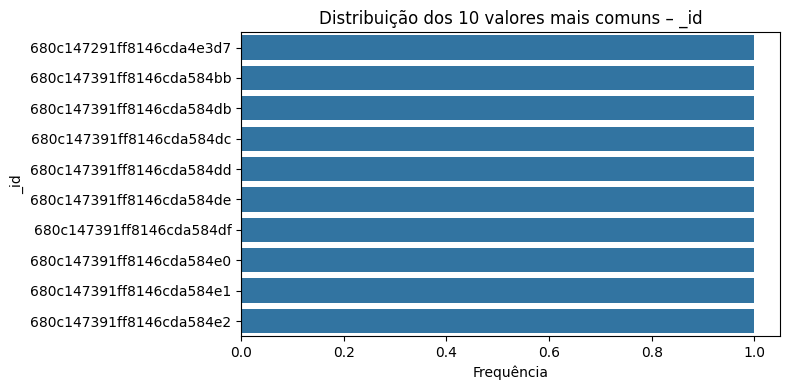

,Valor,Frequência,Percentagem
0,False,58193,94.10%
1,True,3649,5.90%


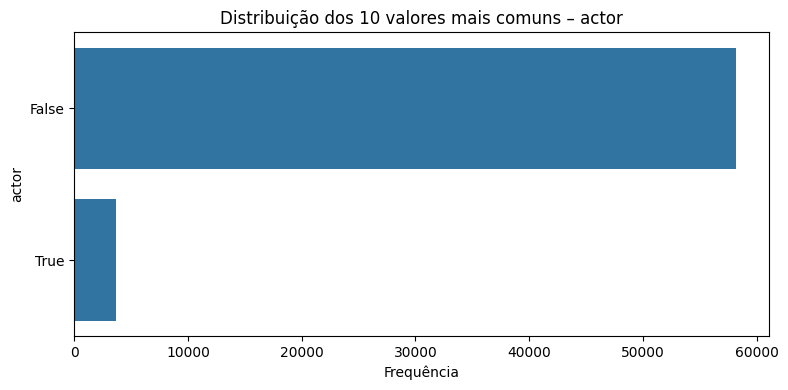

,Valor,Frequência,Percentagem
0,3b2f1c73-57f5-4d50-bfd9-393d2bc012fd,21,0.03%
1,19aefb11-14c2-4a84-b8a4-a4d443c98553,21,0.03%
2,423b85d8-7d27-4c06-91c6-e08adde7c625,21,0.03%
3,8d5e0509-c59a-44db-9c74-23e5f66e9f02,21,0.03%
4,302bf9d7-7559-42e3-a205-f08265e18647,21,0.03%
5,5b275e28-dd38-4d74-b358-fe4400341531,21,0.03%
6,5c3b3204-d101-4a16-af00-62216439f8b5,21,0.03%
7,c7acd3eb-3d9d-4783-948f-7ad8a739df63,21,0.03%
8,29555027-0047-4395-b633-0c7629d8dd04,21,0.03%
9,3b633869-2795-4b7a-a554-5e1d8276d84c,21,0.03%


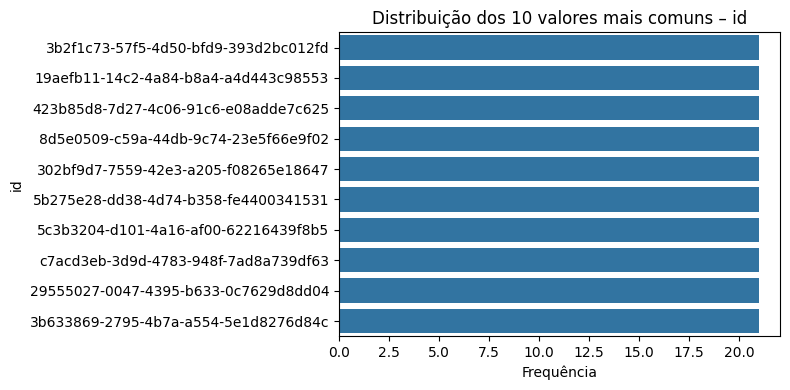

,Valor,Frequência,Percentagem
0,False,60328,97.55%
1,True,1514,2.45%


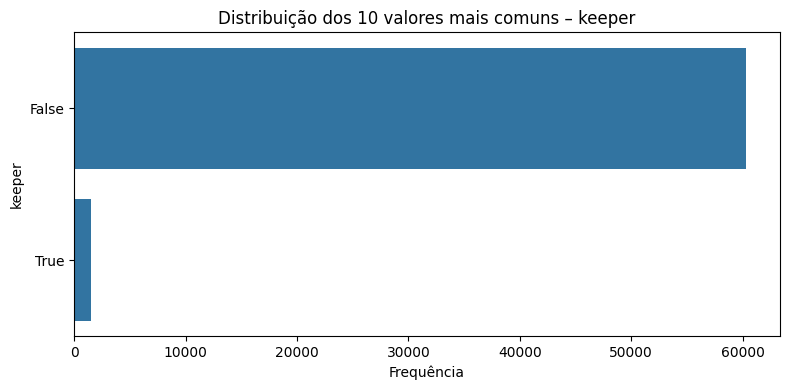

,Valor,Frequência,Percentagem
0,"120.0, 80.0",6,0.01%
1,"120.0, 0.10000000149011612",4,0.01%
2,"117.5999984741211, 50.20000076293945",4,0.01%
3,"91.0999984741211, 50.900001525878906",4,0.01%
4,"17.21390063339733, 35.7601369700974",3,0.00%
5,"20.487700284192783, 23.89279526117698",3,0.00%
6,"10.800000190734863, 37.79999923706055",3,0.00%
7,"39.900001525878906, 65.5",3,0.00%
8,"40.419369273383666, 31.132276497117402",3,0.00%
9,"26.091800101992987, 53.875636871853004",3,0.00%


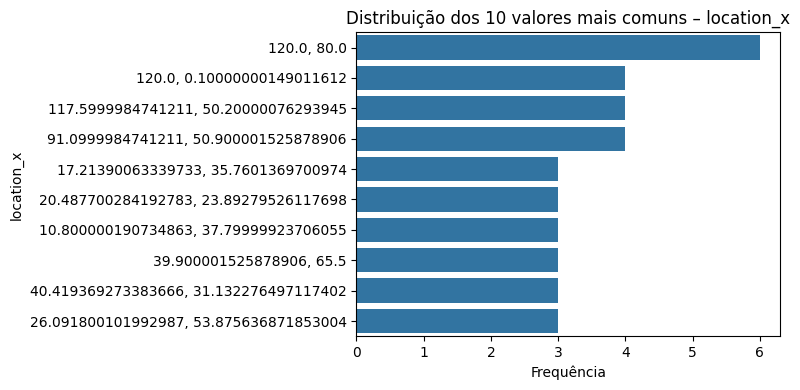

In [ ]:
# ==========================
# 4.2 Análise univariada – variáveis categóricas (versão robusta)
# ==========================

import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Selecionar variáveis categóricas
cat_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns

# Converter listas para strings temporariamente (sem alterar df original)
df_cat = df[cat_cols].copy().applymap(
    lambda v: ', '.join(map(str, v)) if isinstance(v, (list, tuple, set)) else v
)

# Resumo das 5 variáveis categóricas mais relevantes
for col in df_cat.columns[:5]:
    freq = df_cat[col].value_counts(dropna=False)
    perc = (freq / len(df_cat) * 100).round(2)

    tabela = pd.DataFrame({
        'Valor': freq.index.astype(str),
        'Frequência': freq.values,
        'Percentagem': perc.values
    }).head(10)

    styled = (
        tabela.style
        .set_caption(f"📋 Top 10 valores mais frequentes – {col}")
        .background_gradient(cmap="Purples", subset=["Frequência"])
        .format({'Percentagem': '{:.2f}%'})
        .set_table_styles([
            {'selector': 'caption', 'props': [('font-weight', 'bold'), ('font-size', '14px')]},
            {'selector': 'th', 'props': [('text-align', 'left')]},
            {'selector': 'td', 'props': [('text-align', 'left')]}
        ])
    )

    display(styled)

    # ==========================
    # Gráfico de barras
    # ==========================
    plt.figure(figsize=(8, 4))
    sns.barplot(
        x=freq.head(10).values,
        y=[str(i) for i in freq.head(10).index],
        orient='h'
    )
    plt.title(f"Distribuição dos 10 valores mais comuns – {col}")
    plt.xlabel("Frequência")
    plt.ylabel(col)
    plt.grid(False)
    plt.tight_layout()
    plt.show()


# ==========================
# 5.1 Relações entre variáveis numéricas
# ==========================


/Users/rr/.pyenv/versions/3.11.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


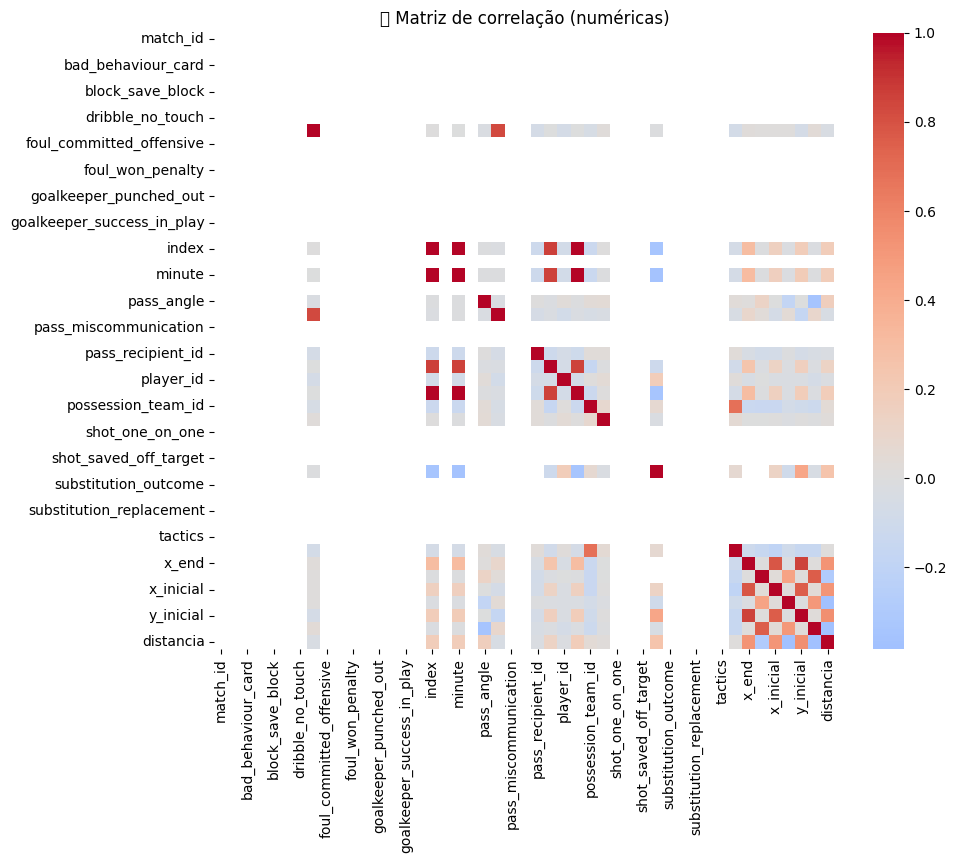

index   minute        0.998957
        possession    0.998491
minute  possession    0.997276
dtype: float64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Selecionar variáveis numéricas
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Matriz de correlação
corr = df[num_cols].corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', center=0, annot=False)
plt.title("🔗 Matriz de correlação (numéricas)")
plt.grid(False)
plt.show()

# Identificar as 3 correlações mais fortes (sem repetição)
corr_unstacked = corr.abs().unstack().sort_values(ascending=False)
corr_unstacked = corr_unstacked[corr_unstacked < 1].drop_duplicates().head(3)
corr_unstacked


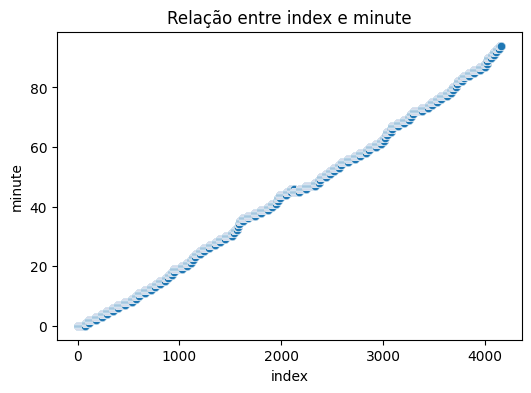

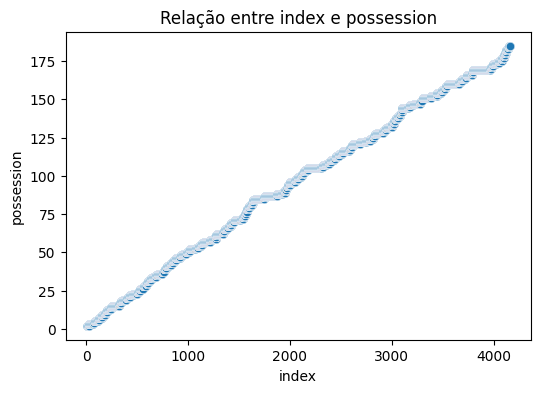

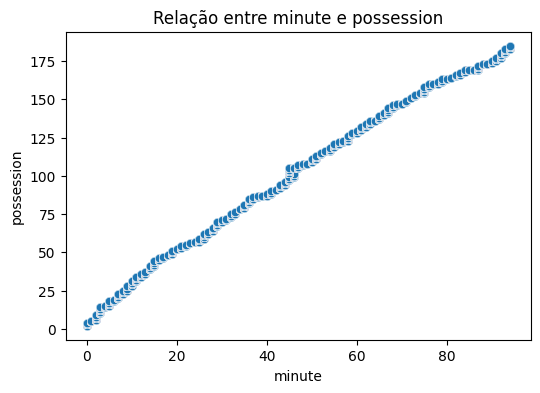

In [ ]:
# ==========================
# 5.1.1 Visualização das correlações mais fortes
# ==========================

for pair in corr_unstacked.index:
    var1, var2 = pair
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[var1], y=df[var2], alpha=0.5)
    plt.title(f"Relação entre {var1} e {var2}")
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.grid(False)
    plt.show()


# ==========================
# 6.1 Correlação múltipla (overview)
# ==========================

/Users/rr/.pyenv/versions/3.11.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


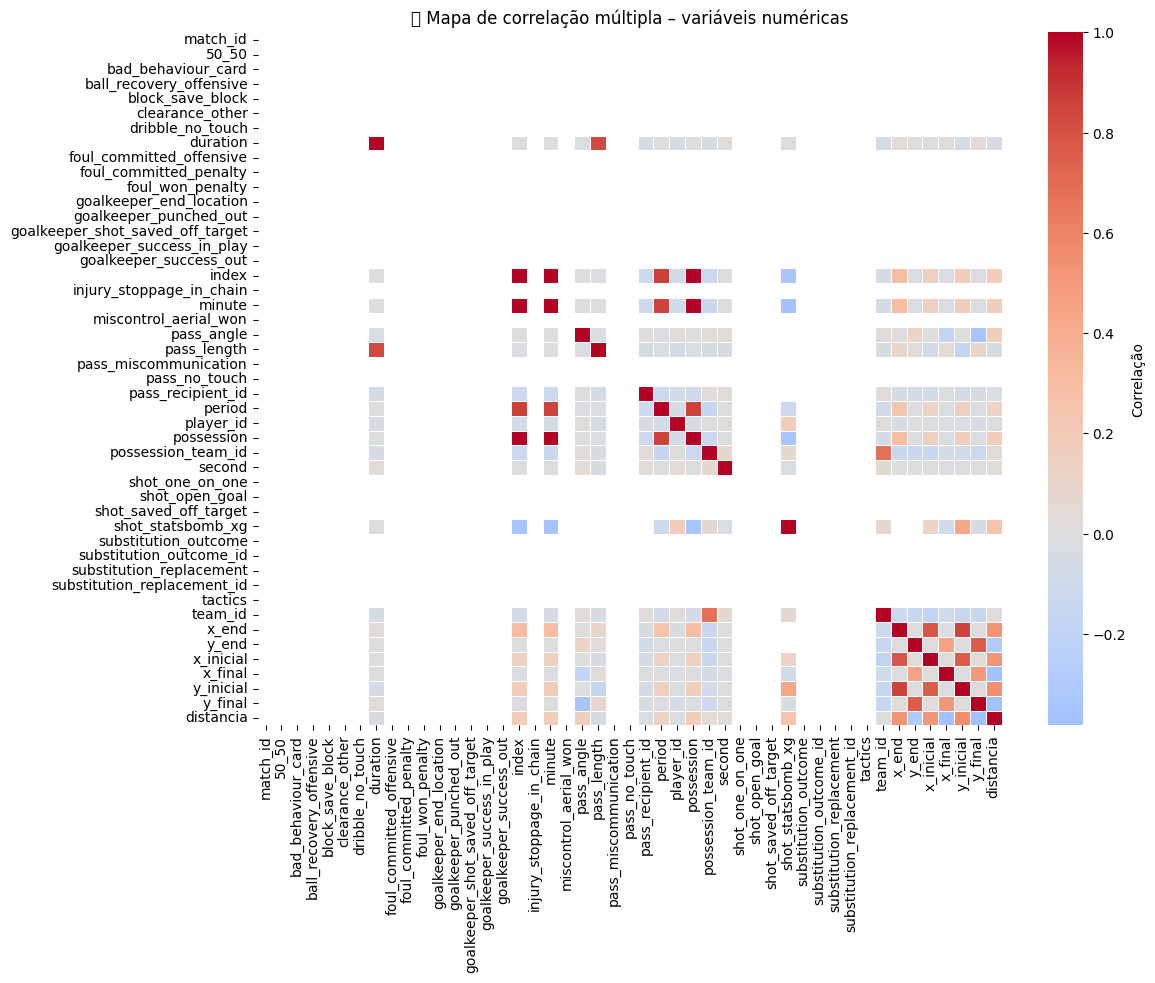

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionar colunas numéricas
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Matriz de correlação completa
corr = df[num_cols].corr(numeric_only=True)

plt.figure(figsize=(12, 9))
sns.heatmap(
    corr,
    cmap="coolwarm",
    center=0,
    linewidths=0.5,
    cbar_kws={'label': 'Correlação'},
)
plt.title("🔗 Mapa de correlação múltipla – variáveis numéricas")
plt.grid(False)
plt.show()

# ==========================
# 6.2 Redução de dimensionalidade com PCA
# ==========================

/Users/rr/.pyenv/versions/3.11.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


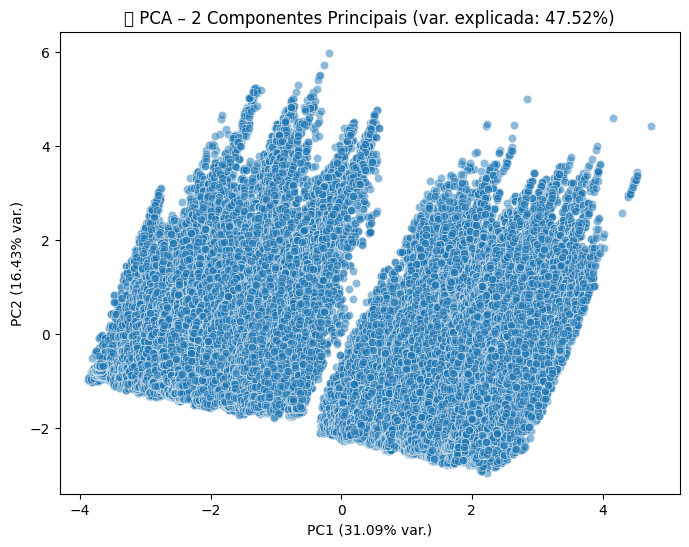

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Selecionar colunas numéricas sem missing
X = df[num_cols].dropna(axis=1)
X_scaled = StandardScaler().fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# Construir DataFrame com componentes
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

# Variância explicada
var_exp = pca.explained_variance_ratio_ * 100

# ==========================
# Visualização
# ==========================
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, alpha=0.5)
plt.title(f"📉 PCA – 2 Componentes Principais (var. explicada: {var_exp.sum():.2f}%)")
plt.xlabel(f"PC1 ({var_exp[0]:.2f}% var.)")
plt.ylabel(f"PC2 ({var_exp[1]:.2f}% var.)")
plt.grid(False)
plt.show()

/Users/rr/.pyenv/versions/3.11.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


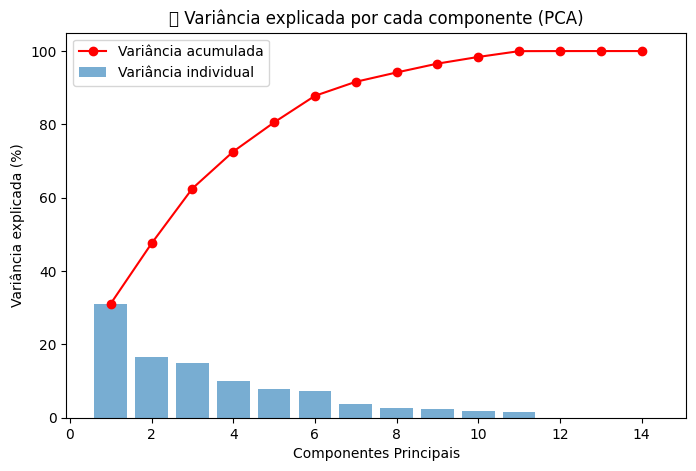

In [ ]:
# ==========================
# 6.2.1 Análise da variância explicada (todas as componentes PCA)
# ==========================

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Selecionar apenas colunas numéricas
X = df.select_dtypes(include=['int64', 'float64']).dropna(axis=1)

# Escalar (fundamental antes do PCA)
X_scaled = StandardScaler().fit_transform(X)

# PCA com todas as componentes possíveis
pca_full = PCA()
pca_full.fit(X_scaled)

# Variância explicada por componente
var_exp = pca_full.explained_variance_ratio_ * 100
var_cum = np.cumsum(var_exp)

# ==========================
# Visualização
# ==========================
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(var_exp) + 1), var_exp, alpha=0.6, label='Variância individual')
plt.plot(range(1, len(var_exp) + 1), var_cum, marker='o', color='red', label='Variância acumulada')
plt.xlabel('Componentes Principais')
plt.ylabel('Variância explicada (%)')
plt.title('📊 Variância explicada por cada componente (PCA)')
plt.legend()
plt.grid(False)
plt.show()


# ==========================
# 6.2.2 Loadings (pesos das variáveis nas componentes principais)
# ==========================

In [ ]:
# ==========================
# 6.2.2 Loadings (pesos das variáveis nas componentes principais)
# ==========================

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Selecionar apenas variáveis numéricas
X = df.select_dtypes(include=['int64', 'float64']).dropna(axis=1)

# Escalar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)

# Extrair loadings (pesos)
loadings = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=X.columns
)

# Adicionar contribuição absoluta (importância)
loadings['|PC1|'] = loadings['PC1'].abs()
loadings['|PC2|'] = loadings['PC2'].abs()

# Ordenar pelas variáveis que mais contribuem
loadings_sorted = loadings.sort_values('|PC1|', ascending=False).head(15)

# Formatar visualmente
styled_loadings = (
    loadings_sorted.style
    .set_caption("📊 Contribuição das variáveis originais nas 2 primeiras componentes PCA")
    .background_gradient(cmap='Blues', subset=['|PC1|'])
    .background_gradient(cmap='Greens', subset=['|PC2|'])
    .format({'PC1': '{:.3f}', 'PC2': '{:.3f}'})
    .set_table_styles([
        {'selector': 'caption', 'props': [('font-weight', 'bold'), ('font-size', '14px')]},
        {'selector': 'th', 'props': [('text-align', 'left')]},
        {'selector': 'td', 'props': [('text-align', 'left')]}
    ])
)

display(styled_loadings)


,PC1,PC2,|PC1|,|PC2|
index,0.477,-0.152,0.477002,0.151661
possession,0.476,-0.151,0.476035,0.150769
minute,0.476,-0.150,0.475785,0.150294
period,0.438,-0.155,0.438249,0.155484
y_inicial,0.197,0.470,0.197319,0.469771
x_inicial,0.182,0.463,0.182023,0.463125
distancia,0.176,0.545,0.176271,0.545498
possession_team_id,-0.112,0.042,0.112247,0.041659
team_id,-0.087,-0.006,0.087488,0.005597
player_id,-0.049,0.031,0.049325,0.031307


| Componente    | Representa            | Variáveis dominantes                             | Interpretação tática               |
| ------------- | --------------------- | ------------------------------------------------ | ---------------------------------- |
| **PC1 (31%)** | Temporal / Sequencial | `index`, `possession`, `minute`, `period`        | Organização e ritmo do jogo        |
| **PC2 (16%)** | Espacial / Posicional | `distancia`, `x_inicial`, `y_inicial`, `y_final` | Distribuição e progressão em campo |


# ==========================
# 9.1 Estatísticas descritivas gerais
# ==========================

In [ ]:
# ==========================
# 9.1 Estatísticas descritivas gerais
# ==========================

import pandas as pd
import numpy as np

# Selecionar apenas colunas numéricas
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Estatísticas principais
desc = df[num_cols].describe().T

# Adicionar métricas complementares
desc['skewness'] = df[num_cols].skew()        # assimetria
desc['kurtosis'] = df[num_cols].kurtosis()    # achatamento (caudas)
desc = desc[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'skewness', 'kurtosis']]

# Apenas as 15 primeiras variáveis
desc_subset = desc.head(15)

# Formatar visualmente
styled_desc = (
    desc_subset.style
    .set_caption("📊 Estatísticas descritivas das variáveis numéricas")
    .background_gradient(cmap='Blues', subset=['mean', 'std'])
    .format({'mean': '{:.2f}', 'std': '{:.2f}', 'skewness': '{:.2f}', 'kurtosis': '{:.2f}'})
    .set_table_styles([
        {'selector': 'caption', 'props': [('font-weight', 'bold'), ('font-size', '14px')]},
        {'selector': 'th', 'props': [('text-align', 'left')]},
        {'selector': 'td', 'props': [('text-align', 'left')]}
    ])
)

display(styled_desc)


,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis
match_id,61842.000000,3895232.00,0.00,3895232.000000,3895232.000000,3895232.000000,3895232.000000,3895232.000000,0.00,0.00
50_50,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan
bad_behaviour_card,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan
ball_recovery_offensive,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan
block_save_block,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan
clearance_other,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan
dribble_no_touch,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan
duration,44871.000000,1.20,1.19,0.000000,0.416514,0.978143,1.645700,14.854641,2.77,17.03
foul_committed_offensive,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan
foul_committed_penalty,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan
